<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_4/01-pesquisador_medico_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)  Um  pesquisador  médico  quer  saber  como  a  dosagem  de  um  novo  medicamento  afeta  a
presença de bactérias em adultos. Para isso, ele realiza um experimento com 60 pacientes e 6
níveis diferentes de dosagem. Ele quer saber a contagem bacteriana (um indicador normalizado,
obtido após a cultura de material biológico retirado de cada paciente) para cada dosagem após
48 horas de administração do medicamento.  
Além  deste  teste  de  dosagem,  o  pesquisador  suspeita  que  o  sexo  de  cada  paciente  poderia
afetar o resultado. Para avaliar este efeito, o pesquisador planeja o experimento de tal forma
que o efeito do sexo poderia ser avaliado posteriormente. Para isso, dos 60 pacientes testados,
30 eram homens e 30 mulheres.
Analise os dados da planilha Green_Belt_FM2S_Lista_Exercícios_03_e_04, na aba
01.Teste_Medicamento.



| Coluna da Worksheet     | Descrição                                                                                                   |
|-------------------------|-------------------------------------------------------------------------------------------------------------|
| Paciente                | O paciente que recebeu o ensaio.                                                                            |
| Dose (mg/kg)            | A dosagem do medicamento administrado aos pacientes. Existem seis níveis de dosagem: 0,5; 1,0; 1,5; 2,0; 2,5; e 3,0. |
| Contagem de bactérias   | O valor para um exame de contagem de bactérias (normalizado).                                                |
| Sexo                    | Masculino ou feminino                                                                                       |

Responda:
1. Avalie um modelo de Regressão Linear para ajustar os dados.
2. Quanto da variação na contagem pode ser explicada pela dosagem?  
3. Avalie um modelo de Regressão Linear levando em conta a diferença de sexos.
Qual é o impacto no R²?
4. Dado o melhor modelo, estime quanto deveria ser a contagem dada uma dose de
2,7 mg/kg.

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [25]:
url = '/content/[FM2S] Lista_Exercícios_ 3 e 4.xlsx'
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [33]:
dados_pacientes = pd.read_excel(url, sheet_name=0) # dados_pacientes = pd.read_excel(url, sheet_name='1.Teste_Medicamento')

In [34]:
print(dados_pacientes.head())
print(dados_pacientes.describe())
print(dados_pacientes.info())

   Paciente  Dose (mg/kg)  Contagem Sexo
0         1           0.5        95    M
1         2           0.5        90    M
2         3           0.5        99    M
3         4           0.5        92    M
4         5           0.5        85    M
        Paciente  Dose (mg/kg)   Contagem
count  60.000000     60.000000  60.000000
mean   30.500000      1.750000  72.966667
std    17.464249      0.861119  13.739670
min     1.000000      0.500000  40.000000
25%    15.750000      1.000000  64.250000
50%    30.500000      1.750000  73.000000
75%    45.250000      2.500000  83.500000
max    60.000000      3.000000  99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Paciente      60 non-null     int64  
 1   Dose (mg/kg)  60 non-null     float64
 2   Contagem      60 non-null     int64  
 3   Sexo          60 non-null     object 
dtypes: float64(

## 1. Avalie um modelo de Regressão Linear para ajustar os dados.

In [20]:
# Modelo de regressão linear simples
X = dados_pacientes['Dose (mg/kg)']
y = dados_pacientes['Contagem']
X = sm.add_constant(X)  # Adiciona o intercepto (beta_0)
modelo_simples = sm.OLS(y, X).fit()
print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:               Contagem   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     510.6
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           1.95e-30
Time:                        15:10:20   Log-Likelihood:                -173.37
No. Observations:                  60   AIC:                             350.7
Df Residuals:                      58   BIC:                             354.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           99.4267      1.303     76.312   

## 2. Quanto da variação na contagem pode ser explicada pela dosagem?

O R² está diretamente no output do modelo. Isso significa que 89.8% da variação na contagem bacteriana é explicada pela dose.

## 3. Avalie um modelo de Regressão Linear levando em conta a diferença de sexos. Qual é o impacto no R²?


In [21]:
# Codificar sexo como variável dummy (F = 1, M = 0)
dados_pacientes['Sexo_F'] = (dados_pacientes['Sexo'] == 'F').astype(int)

# Modelo múltiplo
X_mult = dados_pacientes[['Dose (mg/kg)', 'Sexo_F']]
X_mult = sm.add_constant(X_mult)
modelo_mult = sm.OLS(y, X_mult).fit()
print(modelo_mult.summary())

                            OLS Regression Results                            
Dep. Variable:               Contagem   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           2.45e-29
Time:                        15:13:16   Log-Likelihood:                -172.50
No. Observations:                  60   AIC:                             351.0
Df Residuals:                      57   BIC:                             357.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          100.1600      1.415     70.806   

## 4. Dado o melhor modelo, estime quanto deveria ser a contagem dada uma dose de 2,7 mg/kg.

In [22]:
# Usando o modelo múltiplo (se for melhor)
dose = 2.7
# Para homens (Sexo_F = 0)
contagem_homem = modelo_mult.params['const'] + modelo_mult.params['Dose (mg/kg)'] * dose
# Para mulheres (Sexo_F = 1)
contagem_mulher = contagem_homem + modelo_mult.params['Sexo_F']

print(f"Contagem prevista (Homem): {contagem_homem:.2f}")
print(f"Contagem prevista (Mulher): {contagem_mulher:.2f}")

Contagem prevista (Homem): 59.34
Contagem prevista (Mulher): 57.87


## Gráficos para Visualização

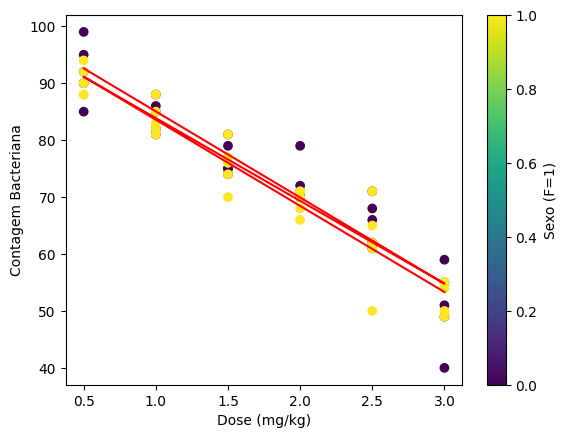

In [23]:
# Gráfico de dispersão com reta de regressão
plt.scatter(dados_pacientes['Dose (mg/kg)'], dados_pacientes['Contagem'], c=dados_pacientes['Sexo_F'], cmap='viridis')
plt.plot(dados_pacientes['Dose (mg/kg)'], modelo_mult.predict(X_mult), color='red')
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Contagem Bacteriana')
plt.colorbar(label='Sexo (F=1)')
plt.show()